In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

2023-02-25 22:27:53.685906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 22:27:55.410473: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-25 22:27:55.410639: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-25 22:27:55.410659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
deva_images_list = tf.data.Dataset.list_files('data/Devasheesh/*.jpg', shuffle=True)
swar_images_list = tf.data.Dataset.list_files('data/Swarnim/*.jpg', shuffle=True)
neg_images_list = tf.data.Dataset.list_files('data/Unknown/*/*.jpg', shuffle=True)

# combine all the images into one dataset
images_list = deva_images_list.concatenate(swar_images_list).concatenate(neg_images_list)

# shuffle the dataset
images_list = images_list.shuffle(buffer_size=1000)
images_list

2023-02-25 22:27:57.970124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 22:27:58.747507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3084 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [3]:
#! see values inside variables
for i in images_list.take(5):
    print(i.numpy())

# print(len(images_list))
print(images_list)

b'data/Unknown/n000040/0010_01.jpg'
b'data/Unknown/n000029/0074_01.jpg'
b'data/Unknown/n000040/0207_01.jpg'
b'data/Swarnim/Swarnim_39.jpg'
b'data/Unknown/n000029/0050_01.jpg'
<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [4]:
# take the image path and return the label
def get_label(image_path):
    parts = tf.strings.split(image_path, os.path.sep)

    if parts[1] == 'Devasheesh':
        return [0, 1, 0] 
        # return 'devasheesh'
    elif parts[1] == 'Swarnim':
        return [0, 0, 1]
        # return 'swarnim'
    elif parts[1] == 'Unknown':
        return [1, 0, 0]
        # return 'unknown'
    else:
        return [0, 0, 0]
        # return 'unknown'


In [5]:
get_label('data/Unknown/n000029/0413_01.jpg')


[1, 0, 0]

In [6]:
# takes the image path and returns the the face as a tensor
def preprocess_image(image_path):
    label = get_label(image_path)
    # label = tf.cast(label, tf.float32)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [360, 480])
    # ? extract the face from the image using dataframe
    image = tf.cast(image, tf.float32)
    # label = tf.reshape(label, image.shape)
    image = image /255.0
    #return (image, label)     
    return image,label


# def extract_numpy(image, label):
#     return tf.cast(image, tf.float32), tf.cast(label, tf.float32)

In [7]:
image,label = preprocess_image('data/Unknown/n000001/0124_01.jpg')
image.shape
image.numpy()[:2]



array([[[0.9372549 , 0.9098039 , 0.5921569 ],
        [0.93835783, 0.9107843 , 0.5910539 ],
        [0.9508578 , 0.9218954 , 0.5785539 ],
        ...,
        [0.91523695, 0.92700166, 0.85249186],
        [0.91384804, 0.92561275, 0.85110295],
        [0.9137255 , 0.9254902 , 0.8509804 ]],

       [[0.9340196 , 0.90656865, 0.5889216 ],
        [0.9351562 , 0.9075827 , 0.5878523 ],
        [0.9480382 , 0.9190758 , 0.57573426],
        ...,
        [0.91930354, 0.9289114 , 0.840382  ],
        [0.91715074, 0.9267586 , 0.8382292 ],
        [0.9169608 , 0.9265686 , 0.8380392 ]]], dtype=float32)

In [18]:
# dataset object

# Define a generator function that yields each file path
# def generator():
#     for filepath in images_list:
#         yield filepath


# dataset = tf.data.Dataset.from_generator(generator, output_types=tf.string)
dataset = images_list.map(preprocess_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)

# dataset = dataset.map(extract_numpy)



In [16]:
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.ParallelMapDataset'>


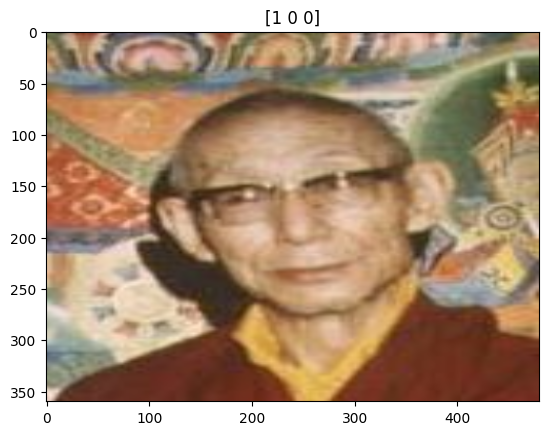

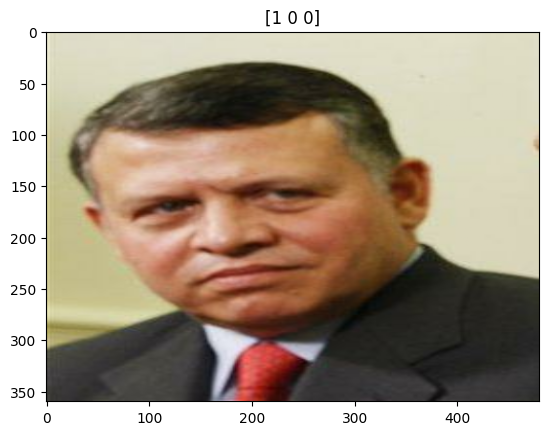

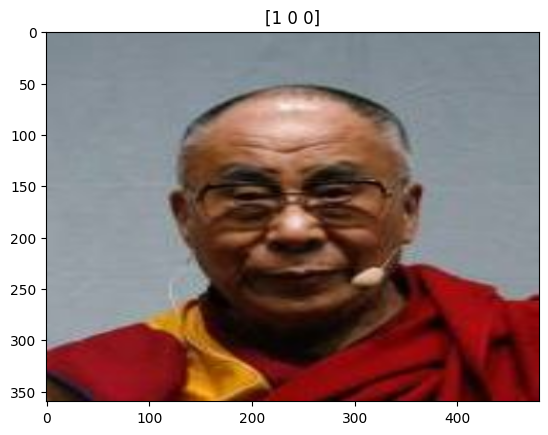

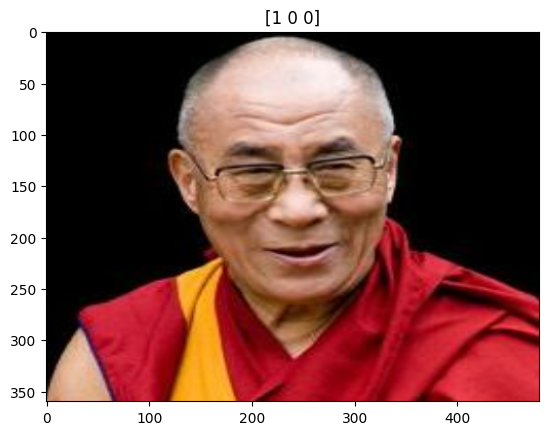

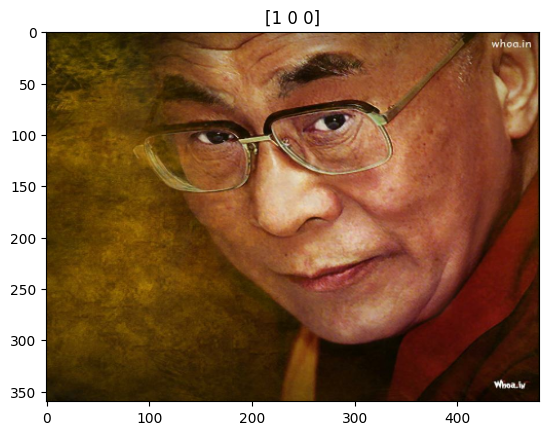

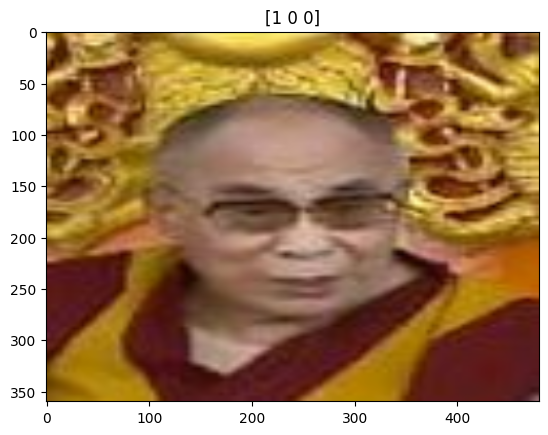

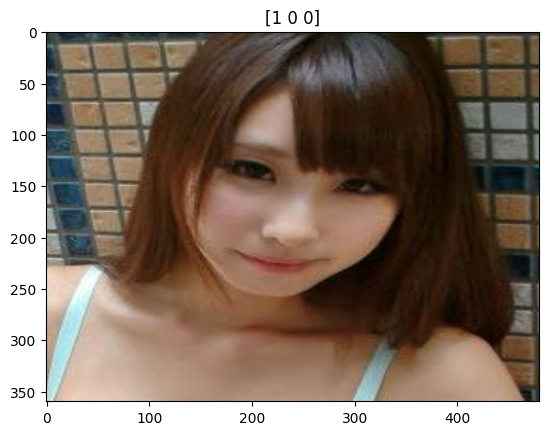

In [19]:
for img,label in dataset.take(7):
    plt.imshow(img.numpy(), cmap='gray')
    plt.title(label.numpy())
    plt.show()
  
  

In [11]:
dataset.take(1)


<TakeDataset element_spec=(TensorSpec(shape=(360, 480, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.int32, name=None))>